In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFilter
import os
import cv2
import random
import tensorflow as tf

from tensorflow import keras

In [16]:
from imutils import paths
import face_recognition
import pickle
import cv2
import os

In [17]:
# Загружаем файл каскада Хаарта
faceCascade = cv2.CascadeClassifier(r"D:\TeachMeSkills\DZ\dz22\haarcascade_frontalface_alt2.xml")

In [18]:
imagePaths =r'D:\TeachMeSkills\DZ\dz27\wiki_crop1\new'

In [27]:
df = pd.DataFrame(columns=['link', 'age']) ### Создаем пустой Dataframe с колонками Link - ссылка на файл, Age - Возраст

for dirname, _,filenames in os.walk(r'D:\TeachMeSkills\DZ\dz27\wiki_crop1'):
    for filename in filenames:
        #формируем ссылку на изображение
        link = os.path.join(dirname, filename)
        
         #### Распознавание лица с помощью каскадов Хаара
        img = cv2.imread(link)
####        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if img.shape[-1]==3:
            img_new = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            img_new = img
        
        faces = faceCascade.detectMultiScale(img_new,
                                     scaleFactor=1.1,
                                     minNeighbors=5,
                                     minSize=(60, 60),
                                     flags=cv2.CASCADE_SCALE_IMAGE)
        if len(faces)==1:
            end = filename[-8:-4]
            start = filename.split('_')[1].split('-')[0]
            age = int(end)-int(start)
            x, y, w, h = faces[0]
            face_selected = img[y:y+h, x:x+h]
            link2 = os.path.join(imagePaths, filename)
            cv2.imwrite(link2,face_selected)             ### Сохраним в файл с таким же именем, но в новую папку.\n",
            df.loc[len(df.index )] = [link2,age]
df.drop_duplicates (subset=['link'])            

,link,age
0,D:\TeachMeSkills\DZ\dz27\wiki_crop1\new\23300_...,49
1,D:\TeachMeSkills\DZ\dz27\wiki_crop1\new\466872...,26
2,D:\TeachMeSkills\DZ\dz27\wiki_crop1\new\69300_...,59
3,D:\TeachMeSkills\DZ\dz27\wiki_crop1\new\81800_...,25
4,D:\TeachMeSkills\DZ\dz27\wiki_crop1\new\86700_...,22
5,D:\TeachMeSkills\DZ\dz27\wiki_crop1\new\106501...,75
6,D:\TeachMeSkills\DZ\dz27\wiki_crop1\new\148301...,92
7,D:\TeachMeSkills\DZ\dz27\wiki_crop1\new\159001...,71
8,D:\TeachMeSkills\DZ\dz27\wiki_crop1\new\172101...,52
9,D:\TeachMeSkills\DZ\dz27\wiki_crop1\new\174001...,48


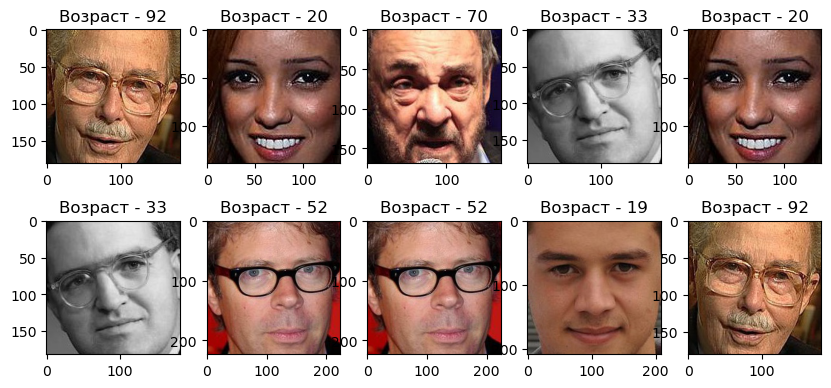

In [47]:
idx = np.random.randint (0,len(df),10)
plt.figure(figsize=(10,12))
for idx in enumerate(idx):
        plt.subplot (5,5,idx[0]+1)
        link = df.iloc[idx[1]]
        image = plt.imread(link[0])
        title = 'Возраст - ' + str(link[1])
        plt.title (title)
        plt.imshow(image, cmap='gray')

In [48]:
end=filename[-8:-4]

In [49]:
start=filename.split('_')[1].split('-')[0]

In [50]:
int(end)-int(start)

22

In [51]:
from tqdm import tqdm

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Activation, Flatten, CategoryEncoding,Dropout, BatchNormalization, AveragePooling2D
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import RootMeanSquaredError

In [56]:
train, test = train_test_split(df, test_size=0.2, random_state=34)

In [60]:
train_datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.3)
test_datagen=ImageDataGenerator(rescale=1./255.)

In [67]:
train_generator=train_datagen.flow_from_dataframe(dataframe=train, x_col="link", y_col="age",subset="training", class_mode="raw", target_size=(224,224), batch_size=32, color_mode='rgb')
valid_generator=train_datagen.flow_from_dataframe(dataframe=train, x_col="link", y_col="age", subset="validation", class_mode="raw", target_size=(224,224), batch_size=32, color_mode='rgb')
test_generator=test_datagen.flow_from_dataframe(dataframe=test, x_col="link", y_col="age", class_mode="raw", target_size=(224,224), batch_size=32, color_mode='rgb')

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer = Adam(),loss="mse", metrics=["mae"])

history = model.fit(train_generator, validation_data=valid_generator, epochs=10)





Found 26 validated image filenames.
Found 10 validated image filenames.
Found 9 validated image filenames.
Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_10/flatten_10/Reshape' defined at (most recent call last):
    File "C:\Users\HP\anaconda3\envs\My\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\HP\anaconda3\envs\My\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\HP\anaconda3\envs\My\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\HP\anaconda3\envs\My\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\HP\anaconda3\envs\My\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\HP\AppData\Local\Temp\ipykernel_16676\3078312599.py", line 29, in <module>
      history = model.fit(train_generator, validation_data=valid_generator, epochs=10)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\HP\anaconda3\envs\My\lib\site-packages\keras\layers\reshaping\flatten.py", line 98, in call
      return tf.reshape(inputs, flattened_shape)
Node: 'sequential_10/flatten_10/Reshape'
Input to reshape is a tensor with 38817792 values, but the requested shape requires a multiple of 100352
	 [[{{node sequential_10/flatten_10/Reshape}}]] [Op:__inference_train_function_12970]

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10)